## Shelling`s agent-based segregation model, using Manhattan metrics.

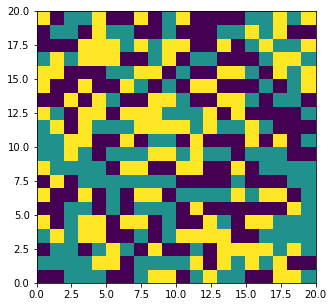

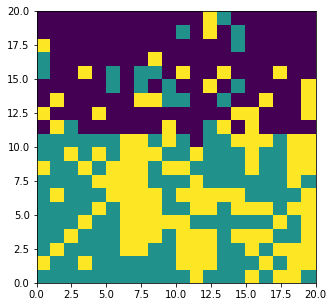


	grid size = 20x20
	population = 261
	ratio = (54.02, 45.98, 1.18)
	tolerance = 259


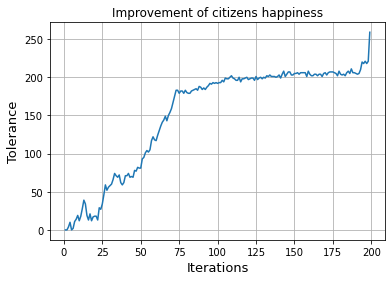

In [7]:
from random import random, choice

import matplotlib.pyplot as plt


def plot_builder(main_list, counter_list):
    settings = {'name': 'Improvement of citizens happiness',
                'x_axis': 'Iterations',
                'y_axis': 'Tolerance',
                'save_to': 'segregation/graphs/Segregation.png'}

    plt.plot(main_list, counter_list)
    plt.xlabel(settings['x_axis'], fontsize=13)
    plt.ylabel(settings['y_axis'], fontsize=13)
    plt.title(settings['name'])
    plt.grid()
    plt.savefig(settings['save_to'], dpi=200, bbox_inches='tight')
    plt.show()


def move_somewhere(st, emp, town):
    k, m = choice(emp)
    n, p = st
    emp.remove((k, m))
    emp.append((n, p))
    town[k][m], town[n][p] = town[n][p], town[k][m]
    return k, m


def is_happy(happy_town, dist, prc, size):
    # Violet = 0
    # Green = 1
    # Yellow = 2
    if dist != 0:
        maximum = 2 * dist + 1

        def count_if_happy():
            x_a = [str(i) for i in range(-dist, dist + 1)]
            x_a.sort(key=lambda a: abs(int(a)))
            return tuple(int(q) for q in x_a)

        x_arr = count_if_happy()
        happy_neighbours = 0
        neighbours = 0
        happy = 0
        moved = []
        empties = [(i, j) for i in range(size) for j in range(size) if happy_town[i][j] == 0]

        for x in range(size):
            for y in range(size):
                curr = happy_town[x][y]
                for y1 in range(-dist, dist + 1):
                    for x1 in x_arr[:maximum - abs(y1) * 2]:
                        try:
                            if x + x1 < 0 or y + y1 < 0 or x1 == 0 and y1 == 0 or (x, y) in moved:
                                raise IndexError
                            neighbours += 1
                            if curr == happy_town[x + x1][y + y1]:
                                happy_neighbours += 1
                        except IndexError:
                            continue
                try:
                    if prc > 100 * happy_neighbours / neighbours:
                        a1, b1 = move_somewhere((x, y), empties, happy_town)
                        moved.append((a1, b1))
                    else:
                        happy += 1
                except ZeroDivisionError:
                    pass
        return happy
    raise ValueError('You can`t use 0 as a distance')


def tolerant_town(iterations_left, grid_size=20, c=None):
    toler = []
    iters = []
    for a in range(iterations_left):
        if c is None:
            c = [[int(random() * 3) for _ in range(grid_size)] for _ in range(grid_size)]
            fig, axs = plt.subplots(1, figsize=(5, 5))
            axs.pcolormesh(c)
            plt.savefig('segregation/graphs/Start_pos.png', dpi=200, bbox_inches='tight')
            plt.show()
        else:
            iters.append(a)
            toler.append(is_happy(happy_town=c, dist=2, prc=55, size=grid_size))
    else:
        fig, axs = plt.subplots(1, figsize=(5, 5))
        axs.pcolormesh(c)
        plt.savefig('segregation/graphs/End_pos.png', dpi=200, bbox_inches='tight')
        plt.show()
        inhabitants = tuple(x for z in range(len(c)) for x in c[z])
        first_group = inhabitants.count(1)
        second_group = inhabitants.count(2)
        population = first_group + second_group
        inhabitants_ratio = (float('{0:.2f}'.format(100 * first_group / population)),
                             float('{0:.2f}'.format(100 * second_group / population)),
                             float('{0:.2f}'.format(first_group / second_group)))
        return f'\n\tgrid size = {grid_size}x{grid_size}\n' \
               f'\tpopulation = {population}\n' \
               f'\tratio = {inhabitants_ratio}\n' \
               f'\ttolerance = {toler[len(toler) - 1]}', iters, toler


if __name__ == '__main__':
    out, m_l, l_l = tolerant_town(200)
    print(out)
    plot_builder(m_l, l_l)